<a href="https://colab.research.google.com/github/dipakgiri17/Projects/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flowers Classification

# The Problem Definition 

In the Iris flowers classification dataset we hav e attributes of multiple species of iris flower. the features in the data set are the petal height and with and sepal height and width in centimetres. We also have the class or the name species of the flower as targets

# Data Collection/Acquisition

## Data Sources

we will fetch the csv files from Machine Learning Repository website.

http://archive.ics.uci.edu/ml/datasets/Iris

## Data Dictionary

Attribute related information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

## Import required libraries

In [1]:
# Basic libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# for R like visuals
plt.style.use('ggplot')

In [2]:
# Scikit-Learn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
# machine learning packages

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [4]:
# tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [5]:
# Pytorch

import torch
import torch.functional as F
import torch.nn as nn

# Load The Dataset

We will load the data set into the data frame right after fetching the csv file from the website.

In [6]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [7]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


as you have noticed in the csv files there is no header. so we need to assign the headers manually.

In [9]:
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

df = pd.read_csv(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
  names=columns
)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Explore The Dataset

In [11]:
df.shape

(150, 5)

there are 5 attributes and 150 records in the data set.

In [12]:
len(df["class"].unique())

3

there are 3 classes/species of Iris flowers in the Dataset.

In [18]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

[]

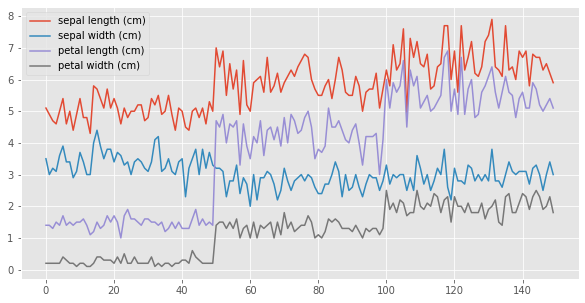

In [24]:
# making the plot bigger
plt.figure(figsize=(10, 5))

# plot all four feature columns together
for i in range(0, 4):
    
    col = df.iloc[:, i]
    plt.plot(col, label=df.columns[i])
    
    # add the label to the legend
    plt.legend()

plt.plot()

# Data Cleaning

## data cleaning: handling missing values

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

as there is no null value in the data set its okay to proceed for the next steps.

## data cleaning: detecting outliers

there are many ways of detecting outliars. we will perform some of them. such as:

1. z-score method
2. interquartile range(IQR) method
3. tukey's fence method

In [26]:
# using z-score

# Z Score = (x − mu)/ sigma 
# x = observation. mu = Mean. sigma = Standard deviation.
# any z-score greater than +3 or less than -3 is considered as outlier.

from scipy import stats

def outliers_for_column(column_name):
    zscores = np.abs(stats.zscore(df[column_name]))
    outliers = np.where(zscores > 3)
    print(f"outliers in column {column_name} are: {np.array(outliers)}")

for column in columns[:-1]:
    outliers_for_column(column)

outliers in column sepal length (cm) are: []
outliers in column sepal width (cm) are: [[15]]
outliers in column petal length (cm) are: []
outliers in column petal width (cm) are: []


I have found that sepal width contains an outlier. so let's remove that outliers. **TODO**

In [27]:
s = df["sepal width (cm)"]

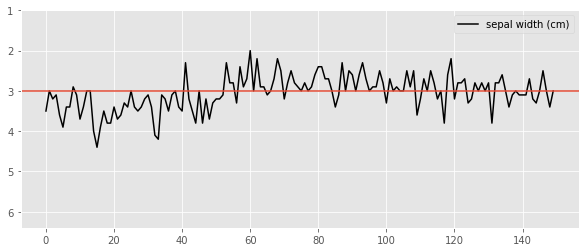

In [51]:

plt.figure(figsize=(10, 4))
plt.ylim(s.max() + 2)

plt.plot(s, color="black", label=s.name)
plt.legend()

plt.axhline(s.median())

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

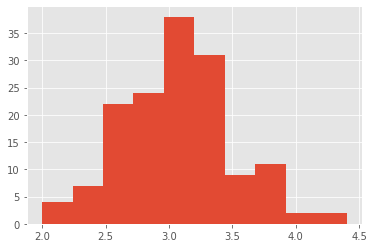

In [28]:
plt.hist(s, bins=10)

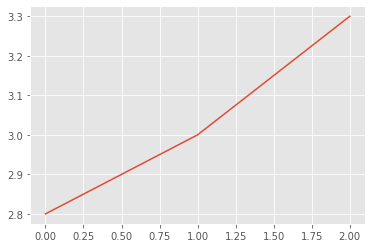

In [30]:

Q1 = np.percentile(s, 25)
Q2 = np.percentile(s, 50)
Q3 = np.percentile(s, 75)

IQR = Q3 - Q1

# 5. Preprocessing Dataset

## pre-processing: split features and target variable

In [ ]:
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

# Data Transformation

## Data Transmission: Normalization and Standardization

## Standardization

normalisation is used when we want to normalize sample ranging from 0 to 1 or - + 1. when we want a sample that is normally distributed means 0 mean and unit standard deviation.

we will use building standard scalar transformation, standard score is also known as z-score. standard scalar transforms the sample value and make the mean equals to zero and the standard deviation equals to one.

z = (x-mu)/sigma

Scaling Down future variables using standardization.

In [ ]:
# It will return a numpy.ndarray
# this will normalize the numerical variables

X = StandardScaler().fit_transform(X)

In [ ]:
X[:6]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079]])

now the value range of the feature variables is normally distributed.

## Data transformation: encoding target lables

there are two main ways of encoding text levels or categorical data into numerical data.

1. **One-Hot Encoding**
2. **Label Encoding**

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

### data transformation: One Hot encoding

In [ ]:
one_hot_encoded = OneHotEncoder().fit_transform(y)
one_hot_encoded.head()

ValueError: ignored

### data transformation: Label encoding

In [ ]:
label_encoded_y = LabelEncoder().fit_transform(y)
label_encoded_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

we will use label encoder here.

In [ ]:
y = label_encoded_y

# Model Selection

## Model Selection: Test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
[a.shape for a in (X_train, X_test, y_train, y_test)]

[(120, 4), (30, 4), (120,), (30,)]

# Model Building

## Machine Learning Model Using Scikit-Learn

## Linear Regression model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

## keras deep learning model

In [ ]:
deep_learning_model_1 = Sequential([
  Dense(6, input_shape=(4,), activation="relu"),
  Dense(1, activation="softmax"),
])

deep_learning_model_1.compile(
  loss='categorical_crossentropy', 
  optimizer='adam', 
  metrics=['accuracy']
)

history = deep_learning_model_1.fit(X_train, y_train, epochs=100, verbose=0)

# Model Evaluation

## linear regression model

In [ ]:
print(f"R^2 score for linear regression model: {round(linear_model.score(X_test, y_test) * 100, 2)}%")

R^2 score for linear regression model: 93.71%


## logistic regression model

In [ ]:
print(f"R^2 score for logistic regression model: {round(logistic_model.score(X_test, y_test) * 100, 2)}%")

R^2 score for logistic regression model: 96.67%


## deep learning model

In [ ]:
score = deep_learning_model_1.evaluate(X_test, y_test, verbose=0)
print(f"accuracy score for deep learning model: {round(score[1] * 100, 2)}%")

accuracy score for deep learning model: 26.67%
